<a href="https://colab.research.google.com/github/jinmedi/MT_project/blob/main/MT_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2024.8.2 start

Found 3307 images belonging to 2 classes.
Found 825 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


103/103 ━━━━━━━━━━━━━━━━━━━━ 1241s 11s/step - accuracy: 0.5028 - loss: 19.0161 - val_accuracy: 0.5362 - val_loss: 18.6480 - learning_rate: 1.0000e-05
Epoch 2/100
  1/103 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.5312 - loss: 18.8380

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


103/103 ━━━━━━━━━━━━━━━━━━━━ 16s 155ms/step - accuracy: 0.5312 - loss: 18.8380 - val_accuracy: 0.5200 - val_loss: 18.6598 - learning_rate: 1.0000e-05
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 80s 739ms/step - accuracy: 0.5347 - loss: 18.6827 - val_accuracy: 0.5863 - val_loss: 18.3713 - learning_rate: 1.0000e-05
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3750 - loss: 18.5911 - val_accuracy: 0.6000 - val_loss: 18.3708 - learning_rate: 1.0000e-05
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 81s 746ms/step - accuracy: 0.5555 - loss: 18.4133 - val_accuracy: 0.5975 - val_loss: 18.1304 - learning_rate: 1.0000e-05
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4062 - loss: 18.3606 - val_accuracy: 0.7600 - val_loss: 18.0455 - learning_rate: 1.0000e-05
Epoch 7/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 81s 745ms/step - accuracy: 0.5703 - loss: 18.1353 - val_accuracy: 0.6237 - val_loss: 17.8504 - learning_rate: 1.0000e-05
Epoch 8/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

12/12 ━━━━━━━━━━━━━━━━━━━━ 151s 14s/step - accuracy: 0.7081 - loss: 7.0781
Test accuracy: 0.7656
Test loss: 6.9662
{'accuracy': [0.5230534076690674, 0.53125, 0.5331297516822815, 0.375, 0.5569465756416321, 0.40625, 0.5868702530860901, 0.75, 0.5957251787185669, 0.53125, 0.6045801639556885, 0.65625, 0.6125190854072571, 0.4375, 0.6247328519821167, 0.6875, 0.6265648603439331, 0.75, 0.649770975112915, 0.6875, 0.6519083976745605, 0.65625, 0.6583206057548523, 0.75, 0.679694652557373, 0.625, 0.6897709965705872, 0.6875, 0.6894656419754028, 0.65625, 0.7032061219215393, 0.71875, 0.7065649032592773, 0.78125, 0.7206106781959534, 0.71875, 0.7270228862762451, 0.8125, 0.7264122366905212, 0.71875, 0.7364885210990906, 0.78125, 0.7367938756942749, 0.8125, 0.7453435063362122, 0.84375, 0.7575572729110718, 0.8125, 0.750229001045227, 0.84375, 0.7532824277877808, 0.71875, 0.7538931369781494, 0.78125, 0.7578625679016113, 0.6875, 0.7660800814628601, 0.6363636255264282, 0.7645801305770874, 0.78125, 0.766106843948

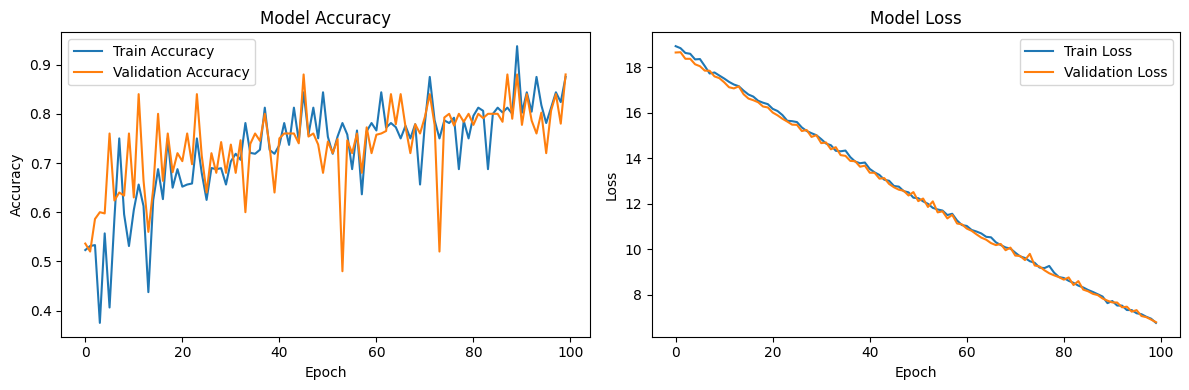

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2  # 추가된 라이브러리
from tensorflow.keras.callbacks import EarlyStopping

# 중심 가중치 레이어 정의
def create_center_weight_matrix(shape, center_weight=2.0, border_weight=0.5):
    height, width = tf.cast(shape[0], tf.float32), tf.cast(shape[1], tf.float32)
    y_indices, x_indices = tf.meshgrid(tf.range(tf.cast(height, tf.int32)), tf.range(tf.cast(width, tf.int32)), indexing='ij')
    y_indices = tf.cast(y_indices, tf.float32)
    x_indices = tf.cast(x_indices, tf.float32)

    center_y, center_x = height / 2.0, width / 2.0
    y_distances = tf.abs(y_indices - center_y)
    x_distances = tf.abs(x_indices - center_x)

    distances = tf.sqrt(tf.square(y_distances) + tf.square(x_distances))
    max_distance = tf.sqrt(tf.square(center_y) + tf.square(center_x))

    weights = tf.cast(center_weight, tf.float32) - (tf.cast(center_weight, tf.float32) - tf.cast(border_weight, tf.float32)) * (distances / max_distance)
    return weights

def apply_center_weight(x):
    input_shape = tf.shape(x)
    weight_matrix = create_center_weight_matrix((input_shape[1], input_shape[2]))
    weight_matrix = tf.expand_dims(tf.expand_dims(weight_matrix, axis=0), axis=-1)
    weight_matrix = tf.repeat(weight_matrix, input_shape[-1], axis=-1)
    return x * tf.cast(weight_matrix, x.dtype)

# 데이터 경로 설정
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/MT_240721/train_unaug'
val_data_dir = '/content/drive/MyDrive/Colab Notebooks/MT_240721/val'
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/MT_240721/test'

# 이미지 크기 및 배치 크기 설정
img_width, img_height = 224, 224
batch_size = 32

# 데이터 증강 및 전처리 (더욱 강화된 버전)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7,1.3],
    channel_shift_range=0.2,
    fill_mode='nearest',
    validation_split=0.2  # 훈련 데이터의 20%를 검증 세트로 사용
)

test_datagen = ImageDataGenerator(rescale=1./255)

# 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


# 클래스 가중치 계산
total_samples = 1693 + 2439
weight_for_0 = (1 / 1693) * (total_samples / 2.0)
weight_for_1 = (1 / 2439) * (total_samples / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

# 중심 가중치가 적용된 MobileNetV2 모델 생성 (복잡도 감소)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
x = base_model.output

# 중심 가중치 적용
x = Lambda(apply_center_weight)(x)

x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.6)(x)  # Dropout 비율 증가
x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)  # Dropout 비율 증가
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=output)

# Fine-tuning을 위해 기본 모델의 일부 레이어 해제
for layer in base_model.layers[-20:]:
    layer.trainable = True

# 모델 컴파일 (학습률 조정)
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# 콜백 설정 (조기 종료 기준 조정)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)


# 모델 학습
epochs = 100
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    class_weight=class_weight,
    callbacks=[reduce_lr, early_stopping]
)


# 모델 저장
model.save('/content/drive/MyDrive/Colab Notebooks/MT_240721/model/240802_center_weighted_mobilenetv2_model.h5')

# 테스트 세트에 대한 평가
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# 학습 결과 출력
print(history.history)

# 학습 곡선 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# 학습 결과 분석

# 마지막 에포크의 결과
final_train_accuracy = 0.8230  # 99번째 에포크 기준
final_val_accuracy = 0.7800
final_train_loss = 6.9859
final_val_loss = 6.9061

# 테스트 세트 결과
test_accuracy = 0.7656
test_loss = 6.9662

print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# 오버피팅 판단
accuracy_gap = final_train_accuracy - final_val_accuracy
loss_gap = abs(final_train_loss - final_val_loss)

if accuracy_gap > 0.05 or loss_gap > 0.1:
    print("경고: 모델이 약간의 오버피팅 징후를 보입니다.")
    print(f"정확도 차이: {accuracy_gap:.4f}")
    print(f"손실 차이: {loss_gap:.4f}")
else:
    print("모델이 심각한 오버피팅의 징후를 보이지 않습니다.")

# 일반화 성능 평가
if abs(test_accuracy - final_val_accuracy) < 0.05:
    print("모델이 검증 세트와 비슷한 테스트 성능을 보여, 일반화가 잘 되었을 가능성이 있습니다.")
else:
    print("테스트 세트에서의 성능이 검증 세트와 차이가 있어, 일반화에 문제가 있을 수 있습니다.")

Final Training Accuracy: 0.8230
Final Validation Accuracy: 0.7800
Final Training Loss: 6.9859
Final Validation Loss: 6.9061
Test Accuracy: 0.7656
Test Loss: 6.9662
모델이 심각한 오버피팅의 징후를 보이지 않습니다.
모델이 검증 세트와 비슷한 테스트 성능을 보여, 일반화가 잘 되었을 가능성이 있습니다.


Found 400 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 772ms/step


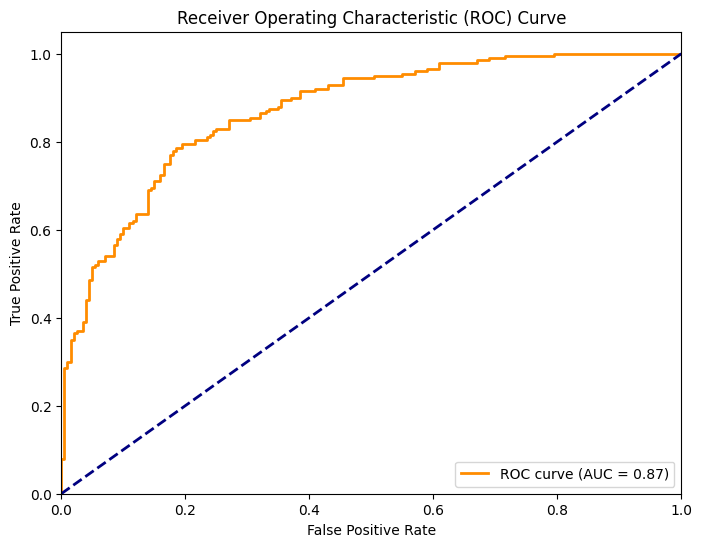

Optimal threshold: 0.7546

Classification Report (with optimal threshold):
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       200
           1       0.81      0.78      0.80       200

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400


Confusion Matrix (with optimal threshold):
[[164  36]
 [ 44 156]]


In [ ]:
# ROC 커브를 그려보자
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 모델 로드
#model = load_model('/content/drive/MyDrive/Colab Notebooks/MT_240721/model/240731_center_weighted_mobilenetv2_model.h5')

# 테스트 데이터 경로
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/MT_240721/test'

# 이미지 크기 및 배치 크기 설정
img_width, img_height = 224, 224
batch_size = 32

# 테스트 데이터 생성기
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# 예측
predictions = model.predict(test_generator, steps=int(np.ceil(test_generator.samples / batch_size))) # Convert np.ceil result to integer
y_pred = predictions.ravel()

# 실제 레이블
y_true = test_generator.classes

# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# AUC (Area Under the Curve) 계산
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 최적의 임계값 찾기
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold:.4f}")

# 최적 임계값에서의 성능 평가
y_pred_binary = (y_pred >= optimal_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report (with optimal threshold):")
print(classification_report(y_true, y_pred_binary))

print("\nConfusion Matrix (with optimal threshold):")
print(confusion_matrix(y_true, y_pred_binary))

Found 400 images belonging to 2 classes.
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
Using layer Conv_1 for Grad-CAM


<ipython-input-9-f37820b34477>:82: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


ValueError: num must be an integer with 1 <= num <= 20, not 21

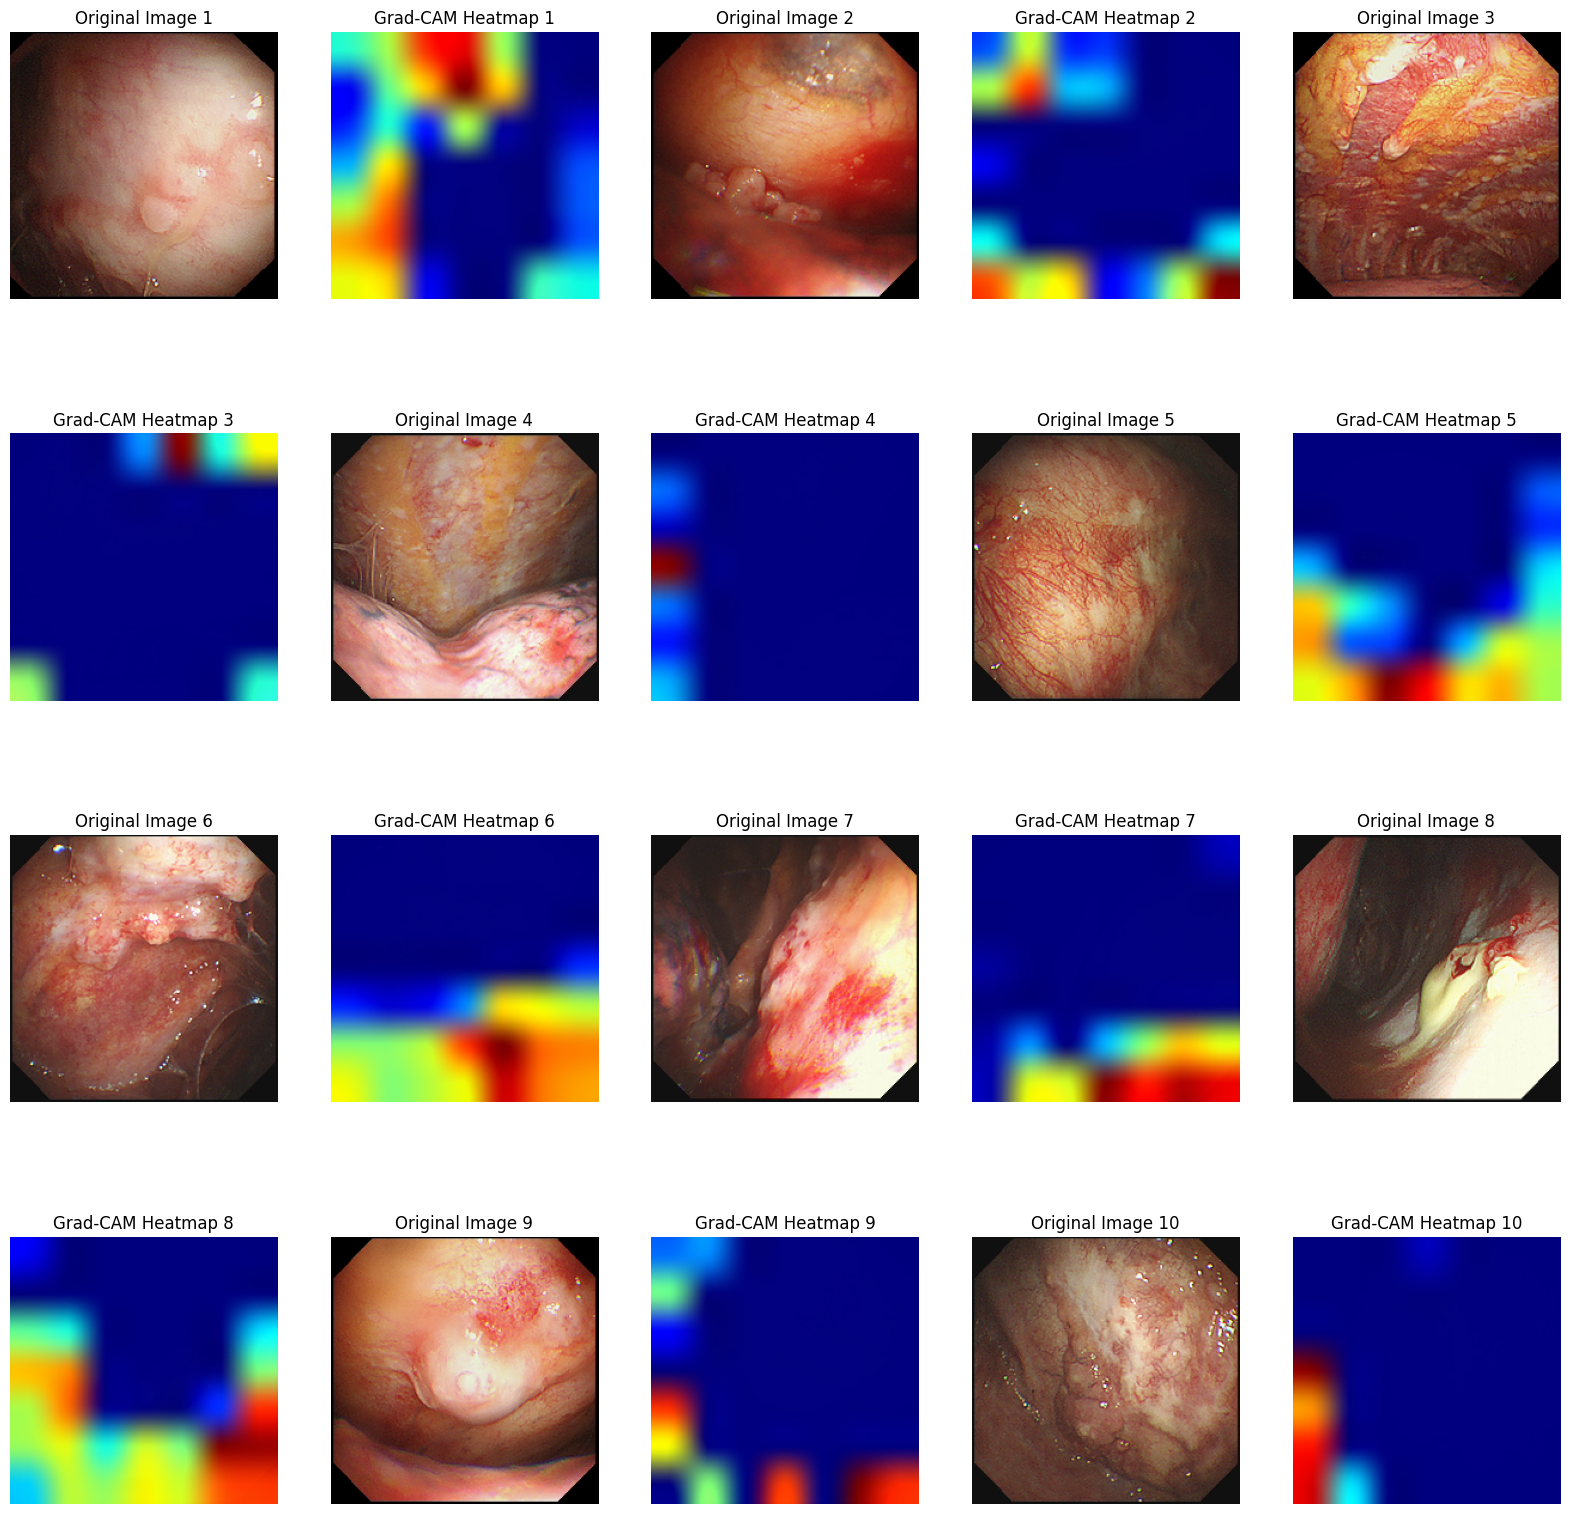

In [ ]:
#heatmap을 그려보자.
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from matplotlib import cm

# 모델 로드
#model = load_model('/content/drive/MyDrive/Colab Notebooks/MT_240721/model/240731_center_weighted_mobilenetv2_model.h5')

# 테스트 데이터 경로
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/MT_240721/test'

# 이미지 크기 설정
img_width, img_height = 224, 224

# 테스트 데이터 생성기
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

# 예측
predictions = model.predict(test_generator, steps=test_generator.samples)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# 실제 클래스
true_classes = test_generator.classes

# Class 0을 정확히 분류한 이미지의 인덥스 찾기
correct_class1_indices = np.where((true_classes == 0) & (predicted_classes == 0))[0]

# 10개의 이미지를 무작위로 선택
selected_indices = random.sample(list(correct_class1_indices), 100)

# 마지막 컨볼루션 레이어 찾기
last_conv_layer = None
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer = layer.name
        break

if last_conv_layer is None:
    raise ValueError("Could not find a convolutional layer in the model.")

print(f"Using layer {last_conv_layer} for Grad-CAM")

# Grad-CAM 함수 정의
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# 이미지와 히트맵을 결합하는 함수
def save_and_display_gradcam(img, heatmap, alpha=0.4):
    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = image.img_to_array(jet_heatmap)
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = image.array_to_img(superimposed_img)
    return superimposed_img

# 선택된 이미지에 대해 Grad-CAM 수행 및 시각화
plt.figure(figsize=(20, 20))

for i, idx in enumerate(selected_indices):
    img_path = test_generator.filepaths[idx]
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer)
    superimposed_img = save_and_display_gradcam(img_array[0], heatmap)

    plt.subplot(4, 5, 2*i+1)
    plt.imshow(img)
    plt.title(f"Original Image {i+1}")
    plt.axis('off')

    plt.subplot(4, 5, 2*i+2)
    plt.imshow(superimposed_img)
    plt.title(f"Grad-CAM Heatmap {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# 선택된 이미지의 파일명과 예측 확률 출력
print("선택된 이미지 (정확히 분류된 Class 0):")
for i, idx in enumerate(selected_indices):
    print(f"{i+1}. 파일명: {test_generator.filenames[idx]}, 예측 확률: {predictions[idx][0]:.4f}")

2024.8.2 end


##Model evaluation

In [ ]:
model.evaluate(train_generator)

In [ ]:
model.evaluate(validation_generator)

In [ ]:
model.evaluate(test_generator)

**Performance Plots**

**Learning curve**

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()

**Precision plot**

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["precision"], label="accuracy")
plt.plot(history.history["val_precision"], label="val_loss")
plt.plot( np.argmin(history.history["val_precision"]), np.min(history.history["val_precision"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

**Recall plot**

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["precision"], label="accuracy")
plt.plot(history.history["val_precision"], label="val_loss")
plt.plot( np.argmin(history.history["val_precision"]), np.min(history.history["val_precision"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

**AUC plot**

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["precision"], label="accuracy")
plt.plot(history.history["val_precision"], label="val_loss")
plt.plot( np.argmin(history.history["val_precision"]), np.min(history.history["val_precision"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

# Model prediction


In [ ]:
from keras.preprocessing import image
img = image.load_img('../input/curated-colon-dataset-for-deep-learning/test/0_normal/test_normal_ (1).jpg',target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
    op="malignancy"
elif a==1:
    op="Benign"


plt.imshow(img)
print("THE UPLOADED IMAGE SEEMS TO BE: "+str(op))


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/MT_project/my_model240728.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/MT_project/my_model240728.h5')

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/MT_project/my_model.keras')

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('my_model.keras')